# Lab Assignment 02
The objective of this lab assignment is to explore a dataset that contains information from customers of a telephone company (`data_lab_02.csv`). We will analyze the features in the dataset and try to determine which of these features are good indicators of customer churn (that is, loss of customers).

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Each task and question is worth **0.5 points** (out of **10 points**).

#### Submission:
This assignment is due **Tuesday, September 22, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. To save your Jupyter notebook as a PDF file, go to `File > Export Notebook As > HTML` or `File > Download As > HTML`, open the HTML file and print it as a PDF file. Additionally, this assignment has a single question on Gradescope and **all pages of the PDF file** must be assigned to this question. A **0.5-point (5%) penalty** will be applied to submissions that do not follow these guidelines. For more instructions on how to submit assignments on Gradescope, see this [guide](http://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf).

Late submissions will be accepted within **0-12**  hours after the deadline with a **0.5-point (5%) penalty** and within **12-24** hours after the deadline with a **2-point (20%) penalty**. No late submissions will be accepted more than 24 hours after the deadline.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

### Part 1: Exploring the Dataset

In [5]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
data = pd.read_csv('data_lab_02.csv')

In [7]:
# Display the first three rows of the dataset
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


**Task 01 (of 15): Display the first three rows and the first three columns of the dataset using the `iloc` and `loc` methods.**
_Hint:_ Remember that the `iloc` method is used for indexing by integer position and the `loc` method is used for indexing by label.

In [8]:
data.iloc[0:3, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415


**Task 02 (of 15): Determine the dimensionality of the dataset. Then, display information (data types, number of values) about the features in the dataset.**
_Hint:_ Use methods `shape` and `info`.

In [11]:
data.loc[0:2,'State': 'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415


In [12]:
data.shape

(3333, 20)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       3333 non-null   object 
 1   Account length              3333 non-null   int64  
 2   Area code                   3333 non-null   int64  
 3   International plan          3333 non-null   object 
 4   Voice mail plan             3333 non-null   object 
 5   Number voice mail messages  3333 non-null   int64  
 6   Total day minutes           3333 non-null   float64
 7   Total day calls             3333 non-null   int64  
 8   Total day charge            3333 non-null   float64
 9   Total eve minutes           3333 non-null   float64
 10  Total eve calls             3333 non-null   int64  
 11  Total eve charge            3333 non-null   float64
 12  Total night minutes         3333 non-null   float64
 13  Total night calls           3333 

**Question 01 (of 05): How many observations and how many features are in the dataset? What are the data types of the features? Are there any missing values?**

#Answer: there are 3333 observations in dataset and 20 features , the datatypes are: bool, float64, int64, and object, there are no missing values 


### Part 2: Transforming the Features

**Task 03 (of 15): Change the data type of feature 'Churn' from bool to int64 and change the values of feature 'International plan' from Yes/No to True/False.**
_Hint:_ Use methods `astype` and `map`.

In [14]:
data['Churn'] = data['Churn'].astype('int64')
change_values = {'No' : False, 'Yes' : True}
data['International plan'] = data['International plan'].map(change_values)
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


**Task 04 (of 15): Create a new numerical feature named 'Total charge' that contains the sum of the day, evening, and night charges. Then, sort the dataset in descending order by total charge.**
_Hint:_ Use method `sort_values`.

In [15]:
data['Total charge'] = data[['Total day charge', 'Total eve charge', 'Total night charge']].astype(float).sum(1)
data.sort_values(by='Total charge', ascending=False)
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,72.86
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,55.54
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,59.00


### Part 3: Summarizing the Features

**Task 05 (of 15): Compute summary statistics for all numerical features and all non-numerical features.**
_Hint:_ Use method `describe` with the appropriate parameters.

In [16]:
data.describe(exclude=['object', 'bool'])

,Account length,Area code,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,56.685173
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.487816
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,19.980000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,49.590000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,56.630000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,63.650000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,92.560000


In [17]:
data.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,False,No
freq,106,3010,2411


**Task 06 (of 15): Group the data by feature 'Churn' and compute summary statistics for all numerical variables again.**
_Hint:_ Use method `groupby`.

In [18]:
data.groupby(['Churn']).describe()

Account length                                                        \
               count        mean       std  min   25%    50%    75%    max   
Churn                                                                        
0             2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0   
1              483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0   

      Area code              ... Customer service calls      Total charge  \
          count        mean  ...                    75%  max        count   
Churn                        ...                                            
0        2850.0  437.074737  ...                    2.0  8.0       2850.0   
1         483.0  437.817805  ...                    4.0  9.0        483.0   

                                                                    
            mean        std    min      25%    50%      75%    max  
Churn                                                               
0      55.705404   9.454475  19.98  49.4625  56.25  62.4175  84.68  
1      62.466418  13.887371  21.09  50.1900  63.96  73.8250  92.56  

[2 rows x 136 columns]

**Task 07 (of 15): Compute the percentage of churned and non-churned customers.**
_Hint:_ Use method `value_counts` with the appropriate parameters.

In [19]:
data['Churn'].value_counts(normalize= True) * 100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

**Task 08 (of 15): Compute the mean values of all numerical features for churned and non-churned customers. Notice the differences and similarities between both groups.**

In [20]:
data[data['Churn']== 1].mean()

Account length                102.664596
Area code                     437.817805
International plan              0.283644
Number voice mail messages      5.115942
Total day minutes             206.914079
Total day calls               101.335404
Total day charge               35.175921
Total eve minutes             212.410145
Total eve calls               100.561077
Total eve charge               18.054969
Total night minutes           205.231677
Total night calls             100.399586
Total night charge              9.235528
Total intl minutes             10.700000
Total intl calls                4.163561
Total intl charge               2.889545
Customer service calls          2.229814
Churn                           1.000000
Total charge                   62.466418
dtype: float64

**Question 02 (of 05): What is the percentage of churned customers? What is the mean total charge for churned customers? What is the percentage of non-churned customers? What is the mean total charge for non-churned customers**

**Answer** # percentage of churned customers is 14.491449
** # the mean total charge for churned customers is 62.466418
** # the percentage of nonchurned customers is 85.508551
** # the mean of total charge for nonchurned customers is 55.705404

### Part 4: Visualizing the Features

In [21]:
data[data['Churn']== 0].mean()

Account length                100.793684
Area code                     437.074737
International plan              0.065263
Number voice mail messages      8.604561
Total day minutes             175.175754
Total day calls               100.283158
Total day charge               29.780421
Total eve minutes             199.043298
Total eve calls               100.038596
Total eve charge               16.918909
Total night minutes           200.133193
Total night calls             100.058246
Total night charge              9.006074
Total intl minutes             10.158877
Total intl calls                4.532982
Total intl charge               2.743404
Customer service calls          1.449825
Churn                           0.000000
Total charge                   55.705404
dtype: float64

**Task 09 (of 15): Visualize the summary statistics of churned and non-churned customers for feature 'Total charge'.**
_Hint:_ Use function `seaborn.boxplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

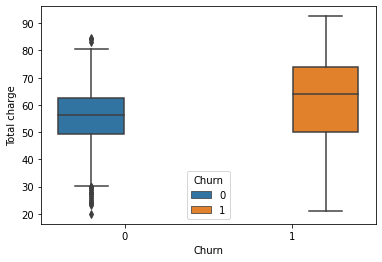

In [22]:
sns.boxplot(x ='Churn', y = 'Total charge',  hue= 'Churn', data = data)

**Question 03 (of 05): What do you observe in the plot?**

**Answer:** What I noticed int the plot is that the customers that have churned have a higher median in total charge, first quartile, and then the third quartiles compare to non churned customers

**Task 10 (of 15): Visualize the number of churned and non-churned customers in each category of feature 'International plan'.**
_Hint:_ Use function `seaborn.countplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

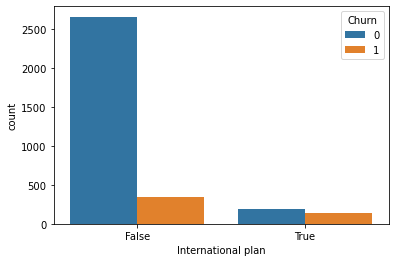

In [23]:
sns.countplot(x='International plan', hue='Churn', data=data);

**Task 11 (of 15): Visualize the number of churned and non-churned customers in each category of feature 'Customer service calls'.**
_Hint:_ Use function `seaborn.countplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

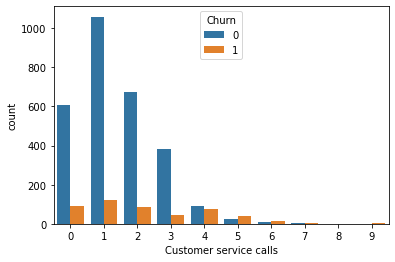

In [24]:
sns.countplot(x='Customer service calls', hue='Churn', data=data)

**Task 12 (of 15): Create a new Boolean feature named 'Many customer service calls' that indicates whether a user has made more than 3 customer service calls.**

In [25]:
data['Many customer service calls'] = data['Customer service calls'].apply(lambda x: True if x > 3 else False)

**Task 13 (of 15): Visualize the number of churned and non-churned customers in each category of feature 'Many customer service calls'.**
_Hint:_ Use function `seaborn.countplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

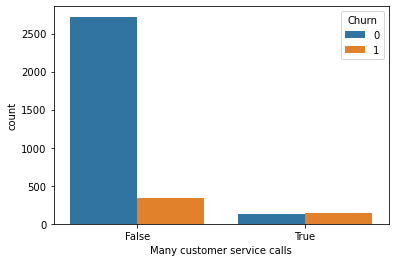

In [26]:
sns.countplot(x = 'Many customer service calls', hue = 'Churn', data=data)

**Question 04 (of 05): What do you observe in the plots?**

**Answer:** I noticed that not many users make more than three customer service calls


### Part 5: Making Conclusions

**Task 14 (of 15): Compute the churn rate (percentage of churned customers) for customers without international plan and for customers with international plan.**
_Hint:_ Use method `value_counts`.

In [27]:
# Compute churn rate for customers without international plan
num_churned = data[data['International plan'] == False]['Churn'].value_counts()[1]
num_nonchurned = data[data['International plan'] == False]['Churn'].value_counts()[0]
churn_rate = num_churned / (num_churned + num_nonchurned)
print(churn_rate)

0.11495016611295682


In [28]:
# Compute churn rate for customers with international plan
num_churned = data[data['International plan'] == True]['Churn'].value_counts()[1]
num_nonchurned = data[data['International plan'] == True]['Churn'].value_counts()[0]
churn_rate = num_churned / (num_churned + num_nonchurned)
print(churn_rate)

0.4241486068111455


**Task 15 (of 15): Compute the churn rate (percentage of churned customers) for customers with 3 customer service calls or less and for customers with more than 3 service calls.**
_Hint:_ Use method `value_counts`.

In [29]:
# Compute churn rate for customers with 3 customer service calls or less
num_churned = data[data['Customer service calls'] <= 3].Churn.value_counts()[1]
num_nonchurned = data[data['Customer service calls'] <= 3].Churn.value_counts()[0]
churn_rate = num_churned / (num_churned + num_nonchurned)
print(churn_rate)

0.11252446183953033


In [31]:
# Compute churn rate for customers with more than 3 customer service calls
num_churned = data[data['Customer service calls'] > 3].Churn.value_counts()[1]
num_nonchurned = data[data['Customer service calls'] > 3].Churn.value_counts()[0]
churn_rate = num_churned / (num_churned + num_nonchurned)
print(churn_rate)

0.5168539325842697


**Question 05 (of 05): What are your final conclusions from the exploration of features 'International plan' and 'Many customer service calls'? What other tasks would you perform to explore this dataset?**

**Answer:** final conclusion is that the features for international plan and many customers service calls are very simillar. Other tasks we can explore is the total charge 